# Neural & Behavioral Modeling - Week 7 (Exercises)
by 張天瑋 B09705049

In [171]:
%config IPCompleter.greedy=True 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import *
plt.rcParams['figure.figsize'] = (10,6)

## 1 Simulate attentional effects on neurons (10 points)

Please read the following article:

Reynolds, J. H., & Desimone, R. (1999). <a href=https://www.salk.edu/wp-content/uploads/2015/11/rd.pdf>The role of neural mechanisms of attention in solving the binding problem.</a> Neuron, 24(1), 19-29.

and use its model equations in Fig. 10 to reproduce its Fig. 3a:<br><br>
<img src=https://www.researchgate.net/profile/Richard_Wezel/publication/224015518/figure/fig2/AS:213837023322122@1427994127491/When-presented-with-two-visual-stimuli-simultaneously-attention-can-lead-to-changes-in.png>

Note that the stimulus was presented from 0 to 200ms in the Fig. 3a.

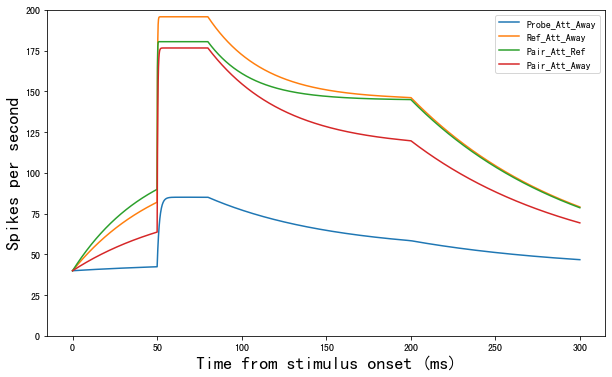

In [193]:
def sigmoid(x,a,c):
    return 1/(1+exp(a*(-(x-c))))
A = 0.01
B = 1
w1_E = [0, 4, 5, 2]
w1_I = [0, 0.1, 0.5, 0.1]
w2_E = [0.2, 0, 0.1, 0.1]
w2_I = [0.5, 0, 0.2, 0.25]
for k in range(0,4):
    # n1 = np.array([0.1])
    # n2 = np.array([0.1])
    y = np.array([0.2])
    dt=0.1 # delta t for Euler integration
    t=np.arange(0,300,dt)
    for i in t:
        E0 = np.array([w1_E[k],w2_E[k]])
        I0 = np.array([w1_I[k],w2_I[k]])
        if i < 50 :
            E = 0.002 * E0
            I = 0.002 * I0
        elif i < 80 :
            E = E0
            I = I0
        elif i < 200:
            E = 0.005 * E0
            I = 0.005 * I0
        else :
            E = 0 * E0
            I = 0 * I0
        # n1_old = n1[-1]
        # n2_old = n2[-1]
        # n1_new = n1_old + dt * (-A * (n1_old - 0.1) + (B - n1_old) * (E[0]) - (n1_old - 0.1) * I[0] - (n1_old - 0.1) * n2_old )
        # n2_new = n2_old + dt * (-A * (n2_old - 0.1) + (B - n2_old) * (E[1]) - (n2_old - 0.1) * I[1] - (n2_old - 0.1) * n1_old )
        # n1 = np.append(n1, n1_new)
        # n2 = np.append(n2, n2_new)
        y_old = y[-1]
        y_new = y_old + dt * (-A * (y_old - 0.2) + (B - y_old) * (E[0] + E[1]) - (y_old - 0.2) * (I[0] + I[1]))
        y = np.append(y , y_new)
    # n1 = sigmoid(n1 , 50, 0.4)
    # n2 = sigmoid(n2, 50 ,0.4)
    y = 200*(y)
    # plt.plot(t,n1[0:-1],'b-') 
    # plt.plot(t,n2[0:-1],'r-')
    plt.plot(t,y[0:-1])
plt.ylim(0, 200)
plt.ylabel("Spikes per second",fontsize=18)
plt.xlabel("Time from stimulus onset (ms)",fontsize=18)
plt.legend(['Probe_Att_Away','Ref_Att_Away','Pair_Att_Ref','Pair_Att_Away'])